In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from collections import Counter
import plotly.graph_objects as go


import datetime as dt
import time
from tqdm import tqdm
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta


import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

import re

import warnings
warnings.filterwarnings('ignore')

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

from yellowbrick.cluster.elbow import kelbow_visualizer

from itertools import combinations

# 정규성 검정 모듈
from scipy.stats import shapiro

# 등분산 검정 모듈
from scipy.stats import bartlett
from scipy.stats import fligner
from scipy.stats import levene


from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu , ranksums

In [2]:
# pip install ipykernel
# pip install --upgrade nbformat

In [28]:
df = pd.read_csv('result.csv')
df

,고객ID,Recency,Frequency,Monetary,Length,평균구매주기,구매카테고리수,총납세액,총구매수량,총할인금액,...,성별,used개수,not used개수,Used_ratio_per_F,Clicked_ratio_per_F,second_category_pca_1,second_category_pca_2,third_category_pca_1,third_category_pca_2,third_category_pca_3
0,USER_0000,-0.365961,0.693147,4.628801,0.000000,-0.475194,-1.271454,1.740150,1.386294,2.331853,...,0,1.098612,0.000000,0.693147,0.000000,0.232740,0.886966,-0.293191,-0.537568,0.691002
1,USER_0001,-0.837001,3.465736,9.642689,5.411646,0.196981,1.238119,7.634776,5.837730,6.662555,...,1,3.044522,2.708050,0.010695,0.013882,0.722953,-0.421938,0.752657,0.120987,0.028289
2,USER_0002,-0.699614,2.197225,7.375936,4.787492,0.053730,-0.016668,5.321061,5.347108,4.880565,...,1,2.484907,0.693147,0.058064,0.058064,0.142694,0.228191,-0.261827,-0.365882,-0.677775
3,USER_0003,-1.249160,2.484907,7.272056,0.000000,-1.466928,-0.644061,5.005718,3.091042,5.031855,...,1,1.945910,1.386294,0.031582,0.041891,-0.668210,-0.171614,-0.532305,0.707652,0.080600
4,USER_0004,-0.365961,2.639057,7.341466,0.000000,-0.475194,0.297029,5.028867,4.043051,5.336326,...,0,2.484907,2.197225,0.023232,0.035681,0.232740,0.886966,-0.532305,0.707652,0.080600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,USER_1463,1.233611,1.386294,6.521681,0.000000,1.320945,-0.644061,3.955469,3.850148,2.500616,...,0,1.386294,0.693147,0.133531,0.133531,0.232740,0.886966,-0.261827,-0.365882,-0.677775
1464,USER_1464,-0.562227,2.995732,7.875863,4.663439,-0.563348,1.551815,5.628235,4.955827,5.443767,...,1,2.833213,1.386294,0.020834,0.027257,-0.668210,-0.171614,0.752657,0.120987,0.028289
1465,USER_1465,0.487799,1.098612,4.863862,4.343805,0.252077,-1.271454,2.945827,2.397895,1.517980,...,1,1.386294,0.693147,0.171850,0.223144,0.232740,0.886966,-0.293191,-0.537568,0.691002
1466,USER_1466,-0.738867,0.693147,5.813533,0.000000,-0.893926,-1.585151,3.427515,1.098612,0.000000,...,0,0.000000,0.693147,0.000000,0.000000,0.157450,0.278253,-0.293191,-0.537568,0.691002


In [29]:
rfm_raw = pd.read_csv('rfm_raw.csv')

In [30]:
core = df.iloc[:, 1:]
core.columns

Index(['Recency', 'Frequency', 'Monetary', 'Length', '평균구매주기', '구매카테고리수',
       '총납세액', '총구매수량', '총할인금액', '총배송료', '최다구매월구매횟수', '고유거래일수', '성별', 'used개수',
       'not used개수', 'Used_ratio_per_F', 'Clicked_ratio_per_F',
       'second_category_pca_1', 'second_category_pca_2',
       'third_category_pca_1', 'third_category_pca_2', 'third_category_pca_3'],
      dtype='object')

In [31]:
pca = PCA(n_components = 2)

rfm_done_pca = pd.DataFrame(data=pca.fit_transform(core), columns=['pca1', 'pca2'])

for method in ['random', 'k-means++']:
    print(method)
    for k in range(3, 10):
        kmeans = KMeans(n_clusters=k, random_state=42, init='k-means++').fit(rfm_done_pca)
        silhouette_avg = silhouette_score(rfm_done_pca, kmeans.labels_)
        print("k = {} -> silhouette index {}".format(k, silhouette_avg))
        core[f'k_{k}_labels'] = kmeans.labels_
    
    print()

random
k = 3 -> silhouette index 0.45399436127032156
k = 4 -> silhouette index 0.4688499106711735
k = 5 -> silhouette index 0.5013244079114328
k = 6 -> silhouette index 0.49576921510777844
k = 7 -> silhouette index 0.46513037200738155
k = 8 -> silhouette index 0.453841651210967
k = 9 -> silhouette index 0.4401412838388272

k-means++
k = 3 -> silhouette index 0.45399436127032156
k = 4 -> silhouette index 0.4688499106711735
k = 5 -> silhouette index 0.5013244079114328
k = 6 -> silhouette index 0.49576921510777844
k = 7 -> silhouette index 0.46513037200738155
k = 8 -> silhouette index 0.453841651210967
k = 9 -> silhouette index 0.4401412838388272



In [32]:
core.columns

Index(['Recency', 'Frequency', 'Monetary', 'Length', '평균구매주기', '구매카테고리수',
       '총납세액', '총구매수량', '총할인금액', '총배송료', '최다구매월구매횟수', '고유거래일수', '성별', 'used개수',
       'not used개수', 'Used_ratio_per_F', 'Clicked_ratio_per_F',
       'second_category_pca_1', 'second_category_pca_2',
       'third_category_pca_1', 'third_category_pca_2', 'third_category_pca_3',
       'k_3_labels', 'k_4_labels', 'k_5_labels', 'k_6_labels', 'k_7_labels',
       'k_8_labels', 'k_9_labels'],
      dtype='object')

In [7]:
rfm_raw.columns

Index(['고객ID', 'Recency', 'Frequency', 'Monetary', 'Length', '총납세액', '평균납세액',
       '총구매수량', '평균구매수량', '총할인금액', '평균할인금액', '평균할인율', '총배송료', '평균배송료', '최다구매월',
       '당월구매횟수', '고유거래일수', '평균구매주기', '추가구매일수', '성별', '고객지역', '가입기간', '구매카테고리수',
       'First_category', 'Second_category', 'Third_category', 'used개수',
       'not used개수', 'clicked개수', 'Used_ratio', 'Used_ratio_per_F',
       'Clicked_ratio', 'Clicked_ratio_per_F'],
      dtype='object')

In [9]:
raw_core = rfm_raw[['Recency', 'Frequency', 'Monetary', 'Length', '성별', '평균구매주기', '구매카테고리수','총납세액', '총구매수량', '총할인금액', '총배송료', '당월구매횟수', '고유거래일수', 'used개수','not used개수', 'Used_ratio_per_F', 'Clicked_ratio_per_F', 'First_category', 'Second_category', 'Third_category']]

### 매출 중심의 전략
1) 매출의 약 75%를 차지하는 상위 3개 그룹을 공략(전체 유저의 약 33%)
2) 상위 3개 그룹의 공통점 : 여성 비율이 높고(61%, 57%, 61%)
                          선호 카테고리는 Apparel > Nest > Stationery

In [40]:
total = pd.concat([raw_core, core['k_8_labels']], axis=1)
total = total.rename(columns={'k_8_labels':'labels'})
total.to_csv('total.csv', index=False)

In [41]:
total = pd.read_csv('total.csv')

In [11]:
money_table = pd.DataFrame(round(total.groupby('labels')['Monetary'].sum().astype(int)/total.groupby('labels')['Monetary'].sum().sum().astype(int), 4) * 100).reindex(index=[5, 1, 4, 3, 0, 6, 7, 2])
money_table['cum_sum'] = money_table['Monetary'].cumsum()
money_table

,Monetary,cum_sum
labels,,
5,31.72,31.72
1,22.49,54.21
4,21.84,76.05
3,8.37,84.42
0,10.22,94.64
6,1.16,95.80
7,3.70,99.50
2,0.49,99.99


In [ ]:
def category_merge(x):
    if x in ['Nest', 'Nest-USA', 'Nest-Canada']:
        return 'Nest'
    elif x in ['Apparel', 'Bags', 'Accessories', 'Headgear', 'More Bags', 'Headgear', 'Backpacks']:
        return 'Apparel'
    elif x in ['Lifestyle', 'Fun', 'Gift Cards']:
        return 'Lifestyle'
    elif x in ['Waze', 'Google', 'Android']:
        return 'IT'
    elif x in ['Housewares', 'Drinkware', 'Bottles']:
        return 'Housewares'
    elif x in ['Office', 'Notebooks & Journals']:
        return 'Stationery'
    else:
        return 'None'

In [12]:
gender_table = pd.DataFrame(total.groupby('labels')['성별'].value_counts().unstack()).reindex(index=[5, 1, 4, 3, 0, 6, 7, 2])
gender_table['total'] = gender_table['남'] + gender_table['여']
gender_table['male_ratio'] = round(gender_table['남'] / gender_table['total'], 2)
gender_table['female_ratio'] = round(gender_table['여'] / gender_table['total'], 2)
gender_table['ratio'] = round(gender_table['total'] / gender_table['total'].sum(), 2)
gender_table['cum_ratio'] = gender_table['ratio'].cumsum()
gender_table

성별,남,여,total,male_ratio,female_ratio,ratio,cum_ratio
labels,,,,,,,
5,37,58,95,0.39,0.61,0.06,0.06
1,89,118,207,0.43,0.57,0.14,0.20
4,75,119,194,0.39,0.61,0.13,0.33
3,64,132,196,0.33,0.67,0.13,0.46
0,97,167,264,0.37,0.63,0.18,0.64
6,34,57,91,0.37,0.63,0.06,0.70
7,88,164,252,0.35,0.65,0.17,0.87
2,50,119,169,0.30,0.70,0.12,0.99


In [13]:
first_table = pd.DataFrame(total.groupby('labels')['First_category'].value_counts().unstack().fillna(0)).reindex(index=[5, 1, 4, 3, 0, 6, 7, 2])
first_table

First_category,Apparel,Housewares,IT,Lifestyle,Nest,Stationery
labels,,,,,,
5,73.0,0.0,0.0,0.0,21.0,1.0
1,132.0,0.0,0.0,1.0,69.0,5.0
4,99.0,1.0,0.0,0.0,87.0,7.0
3,111.0,1.0,0.0,4.0,68.0,12.0
0,120.0,6.0,0.0,6.0,113.0,19.0
6,49.0,1.0,1.0,2.0,26.0,12.0
7,122.0,11.0,1.0,8.0,86.0,24.0
2,86.0,14.0,2.0,15.0,32.0,20.0


In [14]:
second_table = pd.DataFrame(total.groupby('labels')['Second_category'].value_counts().unstack().fillna(0)).reindex(index=[5, 1, 4, 3, 0, 6, 7, 2])
second_table

Second_category,Apparel,Housewares,IT,Lifestyle,Nest,None,Stationery
labels,,,,,,,
5,18.0,0.0,0.0,0.0,72.0,0.0,5.0
1,61.0,1.0,0.0,5.0,119.0,0.0,21.0
4,56.0,1.0,1.0,3.0,97.0,0.0,36.0
3,51.0,14.0,0.0,13.0,82.0,0.0,36.0
0,100.0,15.0,0.0,11.0,94.0,1.0,43.0
6,21.0,10.0,1.0,7.0,27.0,6.0,19.0
7,75.0,24.0,3.0,24.0,62.0,9.0,55.0
2,22.0,8.0,1.0,7.0,22.0,93.0,16.0


In [15]:
third_table = pd.DataFrame(total.groupby('labels')['Third_category'].value_counts().unstack().fillna(0)).reindex(index=[5, 1, 4, 3, 0, 6, 7, 2])
third_table

Third_category,Apparel,Housewares,IT,Lifestyle,Nest,None,Stationery
labels,,,,,,,
5,4.0,7.0,1.0,5.0,14.0,0.0,64.0
1,14.0,25.0,1.0,19.0,37.0,0.0,111.0
4,23.0,22.0,0.0,18.0,52.0,0.0,79.0
3,40.0,28.0,0.0,17.0,46.0,4.0,61.0
0,45.0,41.0,4.0,28.0,75.0,3.0,68.0
6,15.0,12.0,0.0,7.0,12.0,20.0,25.0
7,45.0,36.0,7.0,26.0,54.0,50.0,34.0
2,10.0,6.0,3.0,4.0,1.0,139.0,6.0


In [ ]:
# 1. 클러스터별 전략
# 2. 우량 고객위주의 전략

Recency > 평균구매주기면 이탈 위험이 있는 것으로 간주

vip

gold - 활성 이탈


silver - 활성 이탈

bronze - 활성 이탈

iron


In [39]:
total.groupby('labels').mean().sort_values('Monetary', ascending=False).reindex(index=[5, 1, 4, 3, 0, 6, 7, 2])

,Recency,Frequency,Monetary,Length,평균구매주기,구매카테고리수,총납세액,총구매수량,총할인금액,총배송료,당월구매횟수,고유거래일수,used개수,not used개수,Used_ratio_per_F,Clicked_ratio_per_F
labels,,,,,,,,,,,,,,,,
5,67.515789,80.694737,17073.550298,216.547368,100.042105,12.115789,1752.373266,859.800000,1037.243074,745.790105,36.631579,6.526316,55.957895,25.473684,0.005439,0.008317
1,82.516908,29.942029,5556.038422,182.555556,133.473430,8.657005,546.516499,238.367150,347.886483,261.045942,17.714976,3.772947,20.217391,9.019324,0.012994,0.018505
4,170.262887,28.463918,5757.109647,1.103093,131.706186,8.262887,575.889735,286.768041,355.026170,256.341392,28.340206,1.458763,18.623711,8.618557,0.013962,0.020827
3,112.806122,12.688776,2184.419848,127.193878,143.617347,6.229592,219.330058,92.005102,126.159597,112.864388,8.739796,2.770408,8.265306,3.443878,0.030388,0.046828
0,161.746212,10.693182,1980.527384,0.280303,146.905303,5.708333,198.973323,83.602273,125.216848,95.794432,10.693182,1.178030,7.079545,3.303030,0.038860,0.055078
6,132.010989,5.252747,651.276876,118.956044,151.758242,3.956044,66.683733,24.428571,32.110374,44.219011,3.362637,2.538462,3.571429,1.527473,0.080710,0.113310
7,183.833333,4.769841,750.101198,0.055556,178.904762,3.845238,75.660873,32.329365,39.796540,43.009365,4.769841,1.051587,3.396825,1.503968,0.108370,0.131248
2,190.207101,1.508876,149.616362,0.360947,188.591716,1.674556,15.146338,5.343195,3.618260,12.410414,1.497041,1.029586,0.710059,0.414201,0.258576,0.436346


In [17]:
group_describe = total.groupby('labels').quantile(0.1).sort_values('Monetary', ascending=False).reindex(index=[5, 1, 4, 3, 0, 6, 7, 2])
group_describe

,Recency,Frequency,Monetary,Length,평균구매주기,구매카테고리수,총납세액,총구매수량,총할인금액,총배송료,당월구매횟수,고유거래일수,used개수,not used개수,Used_ratio_per_F,Clicked_ratio_per_F
labels,,,,,,,,,,,,,,,,
5,11.0,41.0,8985.81288,89.8,47.6,10.0,892.21000,289.6,421.5012,389.194,18.0,3.0,27.0,11.4,0.002374,0.004026
1,14.6,18.0,3301.56268,67.6,68.0,6.6,329.31300,84.8,134.0694,154.584,9.6,2.0,12.0,4.6,0.007518,0.011581
4,27.3,17.0,3081.22272,0.0,19.3,6.0,320.08825,68.6,122.1499,142.980,17.0,1.0,10.0,3.0,0.007110,0.010985
3,20.5,7.0,1253.34575,22.0,60.0,4.0,118.41725,27.5,38.9235,56.135,4.0,2.0,3.0,1.0,0.015625,0.026556
0,20.3,6.0,1012.07218,0.0,19.3,4.0,104.12136,20.0,36.6330,44.623,6.0,1.0,3.3,1.0,0.016254,0.027451
6,27.0,2.0,145.81940,27.0,77.0,2.0,17.65340,7.0,0.5780,18.500,1.0,2.0,1.0,0.0,0.013889,0.047619
7,26.3,2.0,299.84125,0.0,26.3,2.0,33.05138,7.0,5.2436,18.000,2.0,1.0,1.0,0.0,0.027797,0.051170
2,54.4,1.0,18.30272,0.0,54.4,1.0,1.68480,1.0,0.0000,6.000,1.0,1.0,0.0,0.0,0.000000,0.000000


Text(0.5, 1.0, 'Monetary')

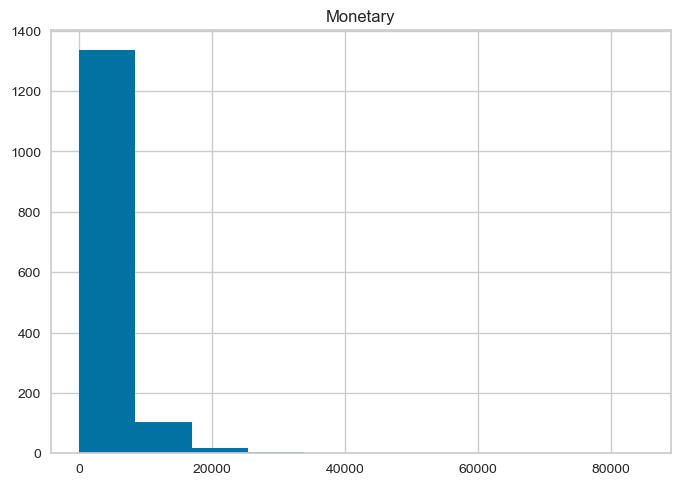

In [18]:
plt.hist(total['Monetary'])
plt.title('Monetary')


k_3_labels
k_3_labels


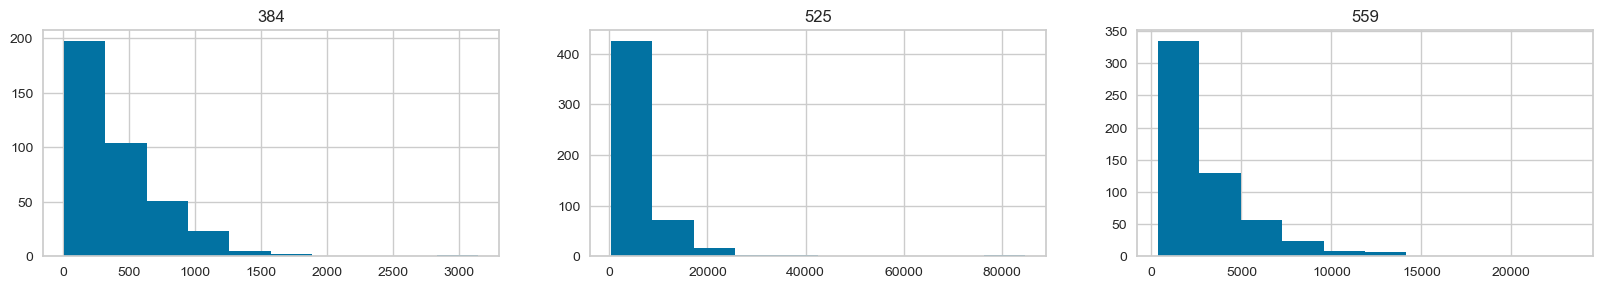


k_4_labels
k_4_labels


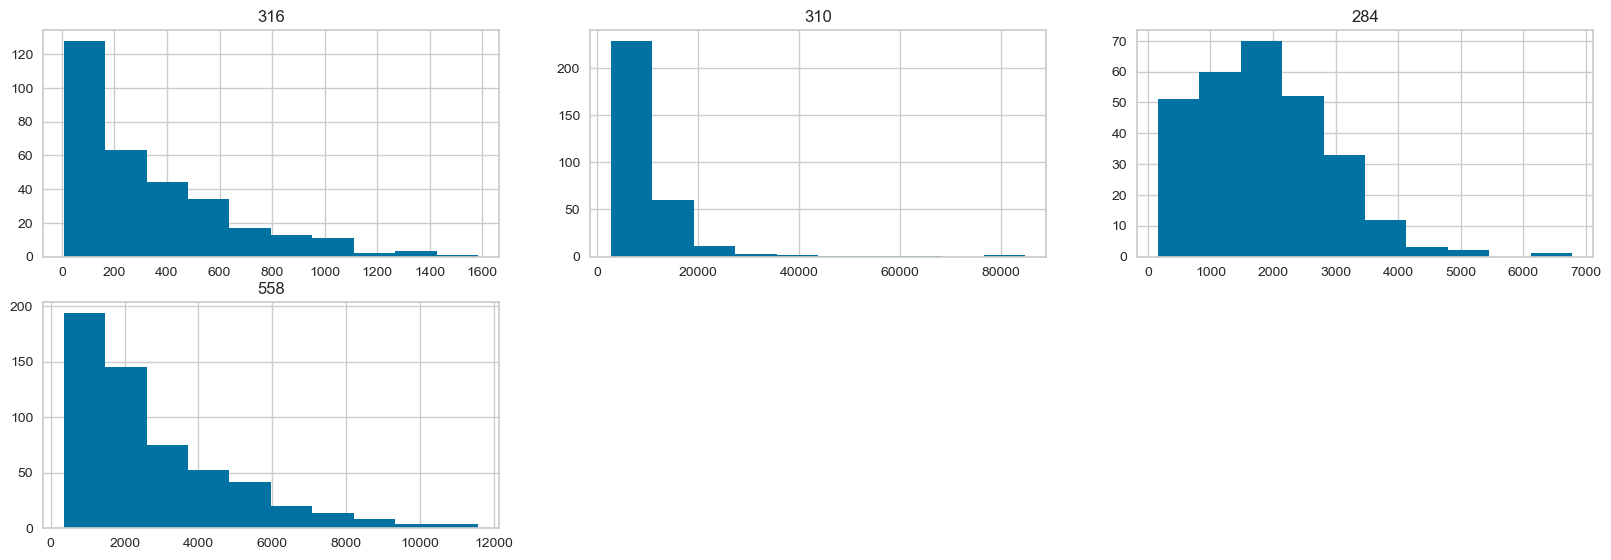


k_5_labels
k_5_labels


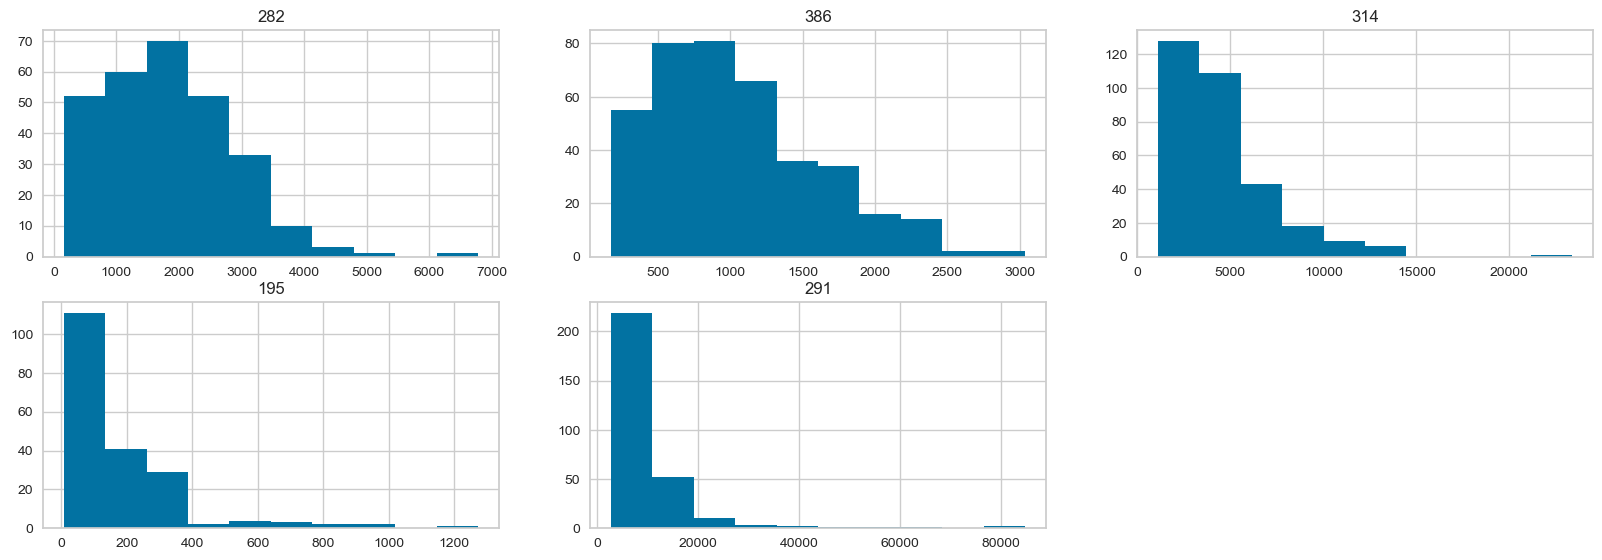


k_6_labels
k_6_labels


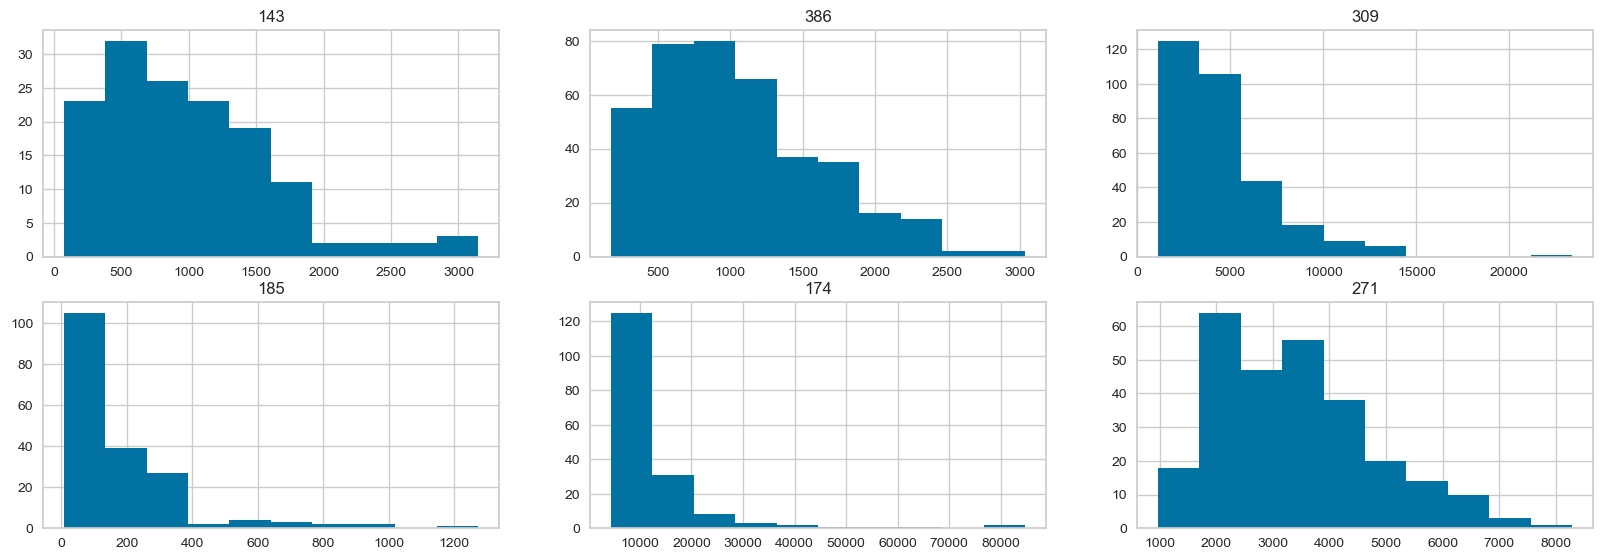


k_7_labels
k_7_labels


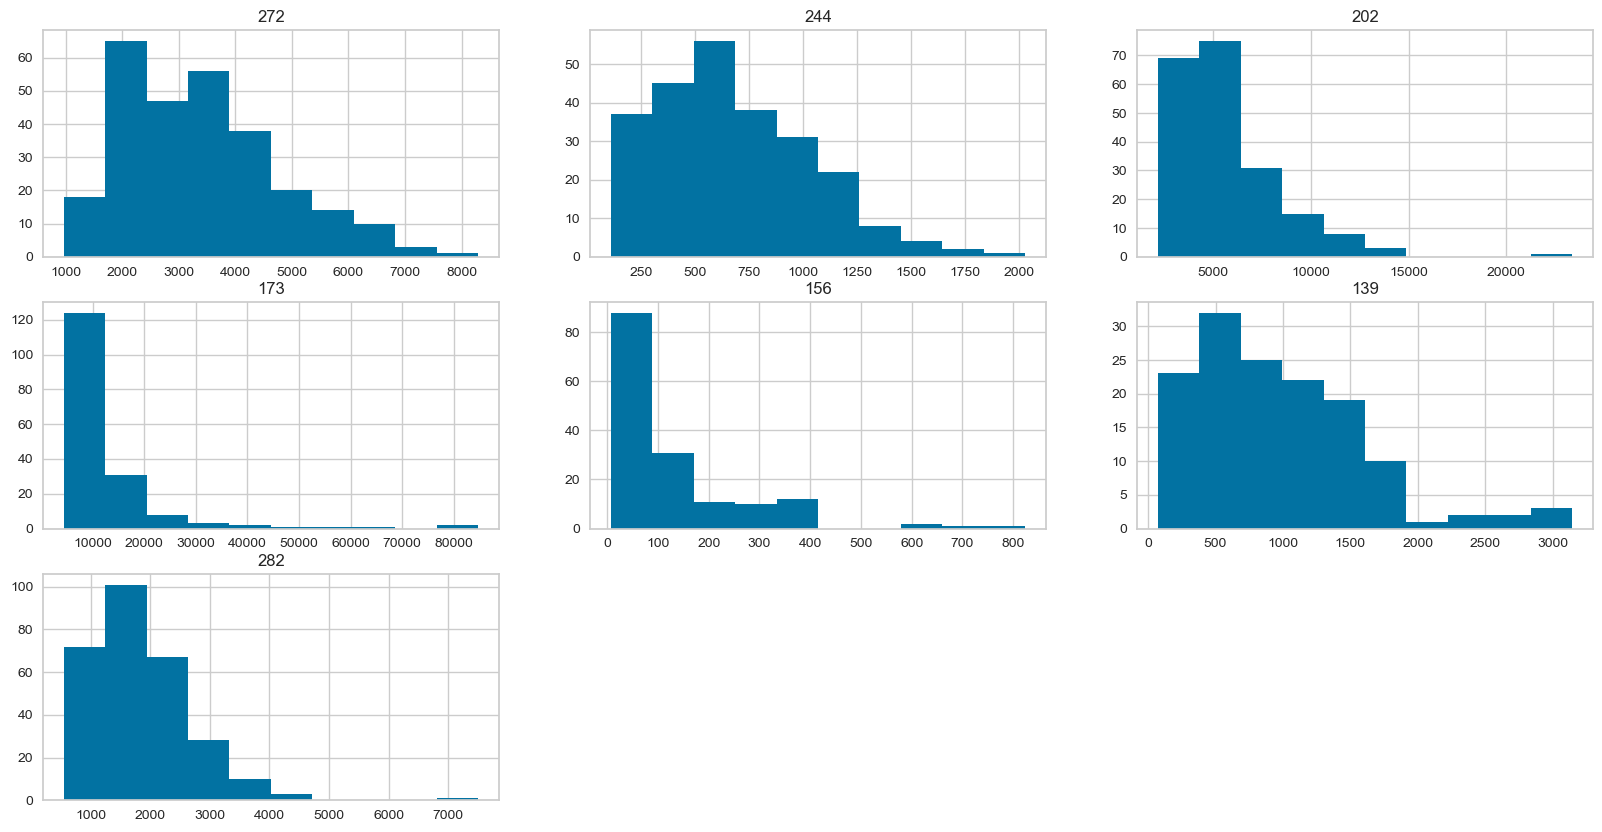


k_8_labels
k_8_labels


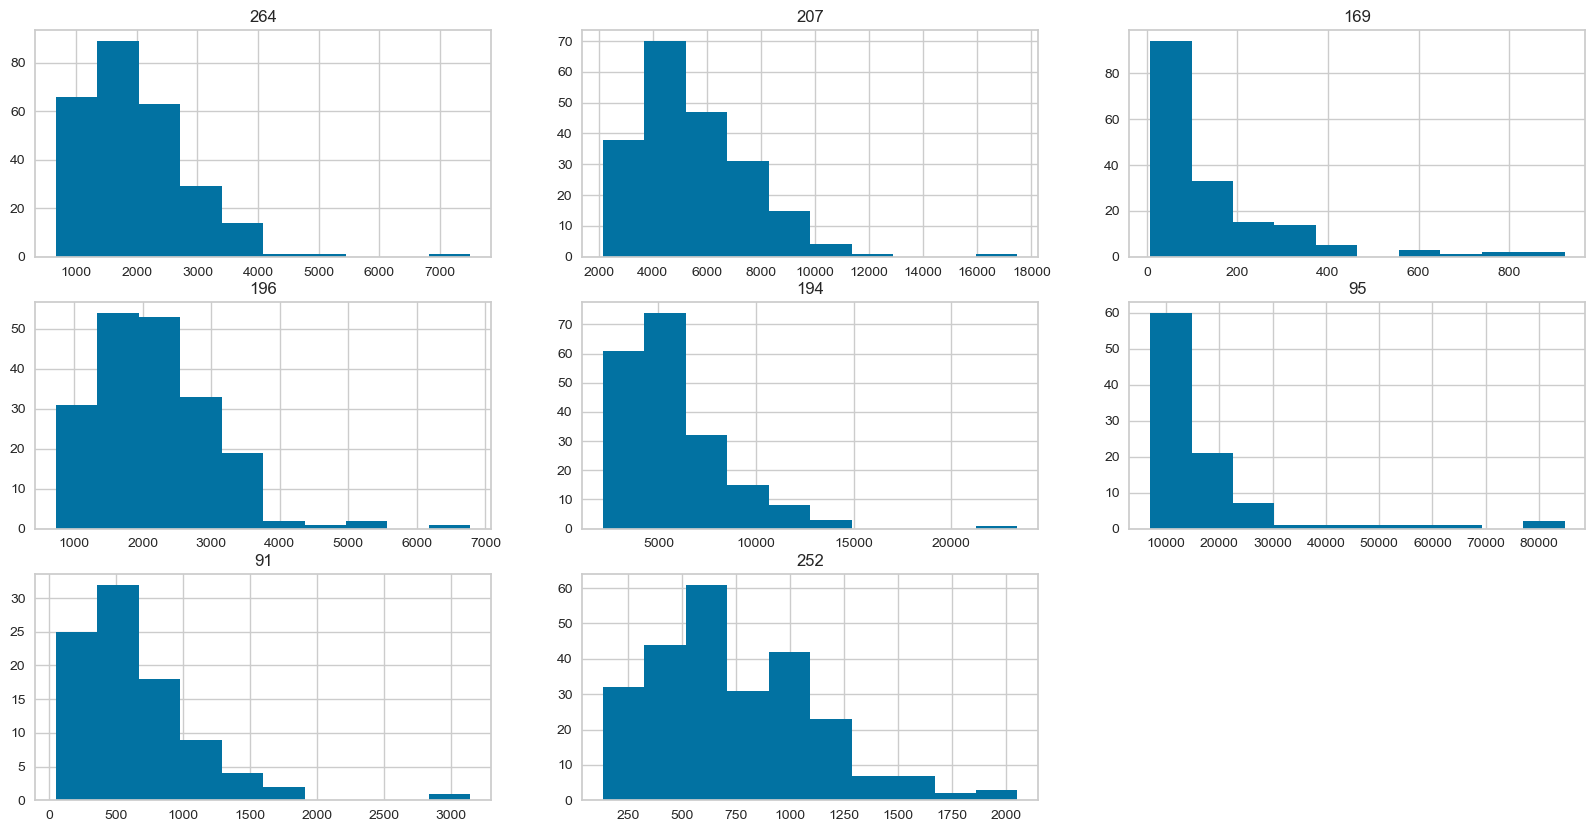


k_9_labels
k_9_labels


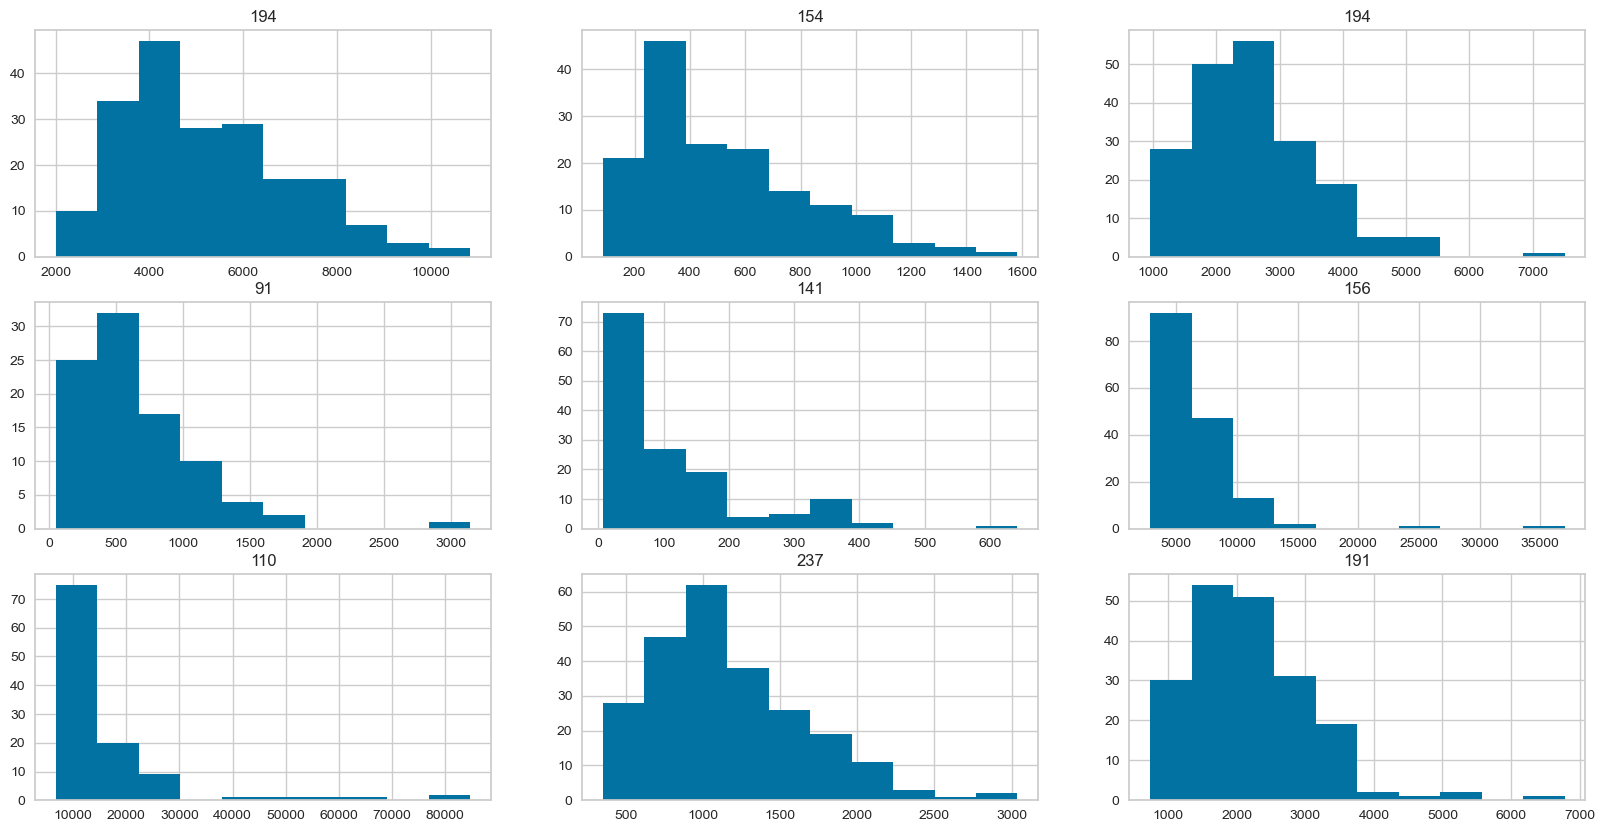

In [34]:
for col in total.iloc[:, -7:].columns:
    stick = int(col.split('_')[1])
    plt.figure(figsize=(20, 10))
    
    
    for i in range(stick):
        plt.subplot(3, 3, i+1)
        plt.hist(total[total[col] == i]['Monetary'])
        plt.title(len(total[total[col] == i]))
    print()
    print(col)
    print(col)
    
    plt.show()


In [20]:
# for col in total.iloc[:, -7:].columns:
#     display(total.groupby(col)[['Recency','Frequency','Monetary', 'Length', '평균구매주기', '구매카테고리수','총납세액', '총구매수량', '총할인금액', '총배송료', '당월구매횟수', '고유거래일수', 'used개수','not used개수', 'Used_ratio_per_F', 'Clicked_ratio_per_F']].quantile(0.25).sort_values('Monetary', ascending=False))

In [21]:
core.columns

Index(['Recency', 'Frequency', 'Monetary', 'Length', '평균구매주기', '구매카테고리수',
       '총납세액', '총구매수량', '총할인금액', '총배송료', '최다구매월구매횟수', '고유거래일수', '성별', 'used개수',
       'not used개수', 'Used_ratio_per_F', 'Clicked_ratio_per_F',
       'second_category_pca_1', 'second_category_pca_2',
       'third_category_pca_1', 'third_category_pca_2', 'third_category_pca_3',
       'k_3_labels', 'k_4_labels', 'k_5_labels', 'k_6_labels', 'k_7_labels',
       'k_8_labels', 'k_9_labels'],
      dtype='object')

In [22]:
cols1 = ['Recency', 'Frequency', 'Monetary', 'Length', '평균구매주기', '구매카테고리수']
cols2 = ['총납세액', '총구매수량', '총할인금액', '총배송료', '최다구매월구매횟수']
cols3 = ['고유거래일수', '성별', 'used개수','not used개수', 'Used_ratio_per_F', 'Clicked_ratio_per_F']
cols4 = ['second_category_pca_1', 'second_category_pca_2',
       'third_category_pca_1', 'third_category_pca_2', 'third_category_pca_3']


cols_groups = [cols1, cols2, cols3, cols4]

def plot_radar_from_centroid(df_centroids, cols):
  df_centroids = df_centroids[cols]
  fig = go.Figure()
  categories = df_centroids.columns
  for row in df_centroids.iterrows():
    fig.add_trace(go.Scatterpolar(
        r=row[1].tolist(),
        theta=categories,
        fill='toself',
        name='cluster {}'.format(row[0])
    ))

  fig.update_layout(
      autosize=False,
      width=1000,
      height=800,
  )
  fig.show()

In [23]:
pca_cluster_result = pd.concat([rfm_done_pca, core.iloc[:, -7:]], axis=1)
pca_cluster_result

,pca1,pca2,k_3_labels,k_4_labels,k_5_labels,k_6_labels,k_7_labels,k_8_labels,k_9_labels
0,-6.144942,0.652578,0,0,3,3,4,2,4
1,6.116787,1.097750,1,1,4,4,3,5,6
2,1.643927,2.313249,1,2,0,5,0,3,8
3,-0.757421,-1.610682,2,3,1,1,6,0,2
4,0.243250,-2.226457,2,3,2,2,6,0,2
...,...,...,...,...,...,...,...,...,...
1463,-3.323931,-1.039946,0,0,1,1,1,7,1
1464,3.272180,1.642270,1,1,4,5,0,1,0
1465,-4.251124,4.247322,0,0,3,0,5,6,3
1466,-6.971393,1.050060,0,0,3,3,4,2,4


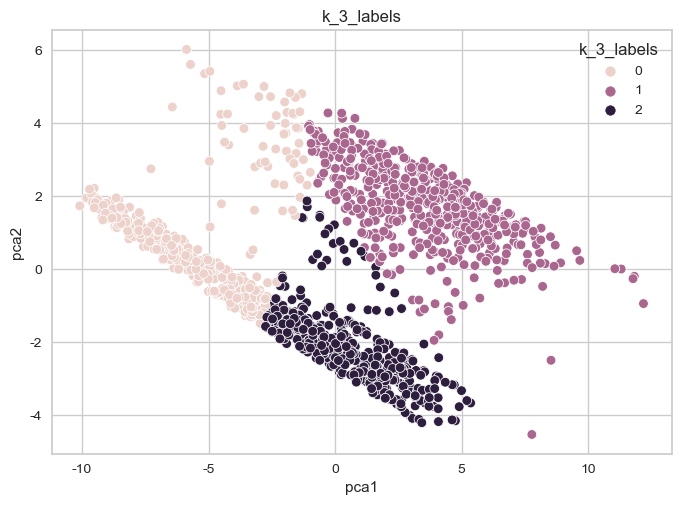

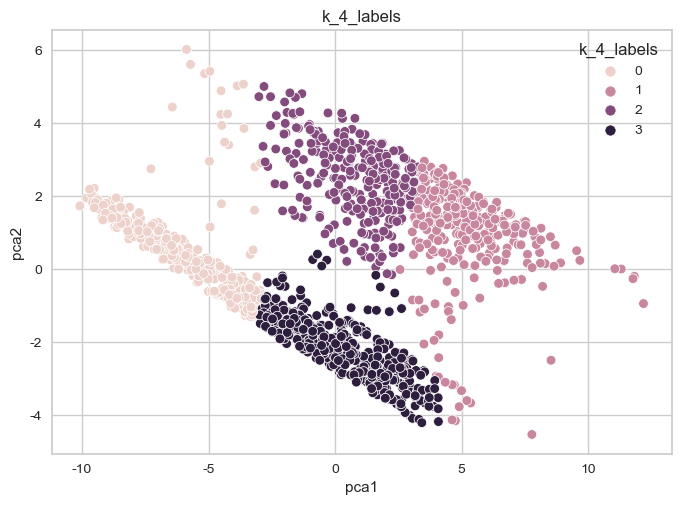

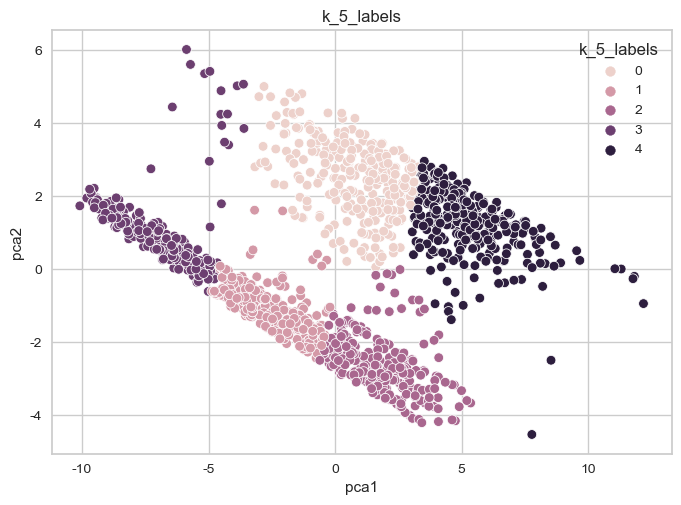

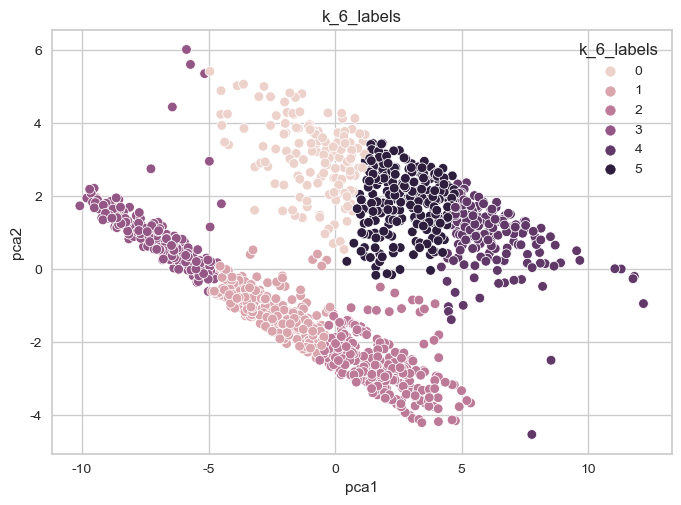

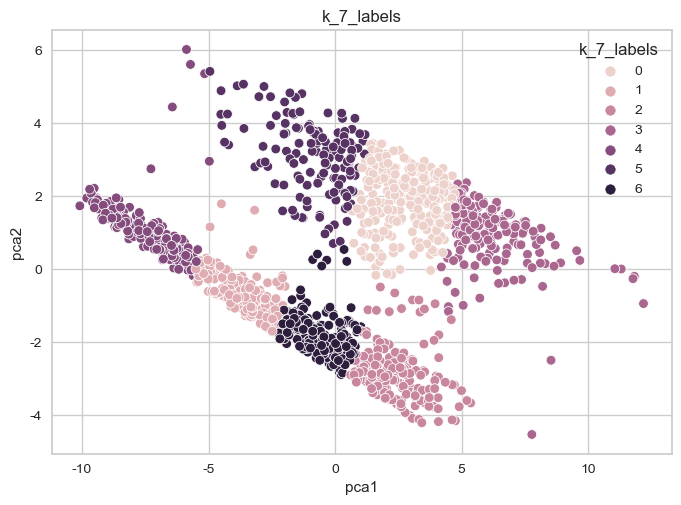

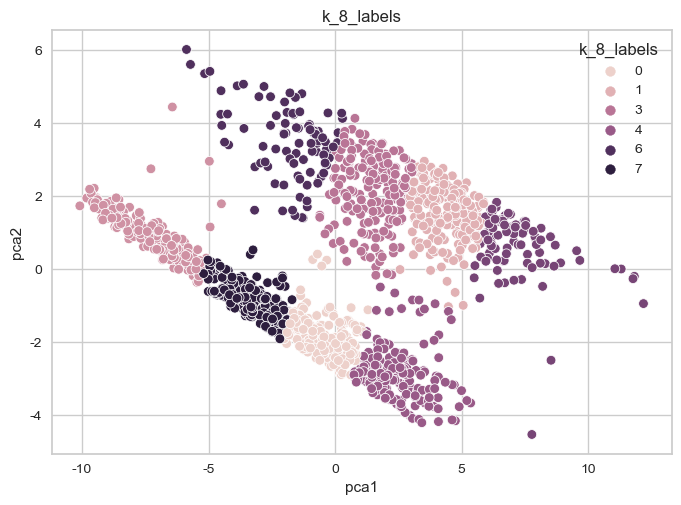

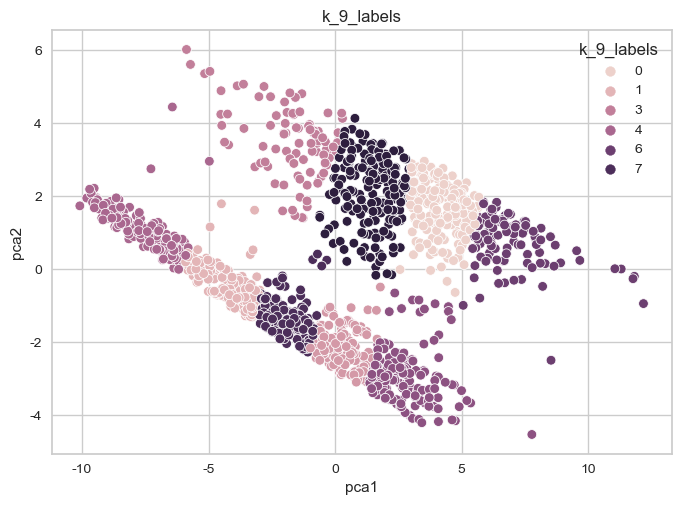

In [24]:
for labels in ['k_3_labels',	'k_4_labels',	'k_5_labels',	'k_6_labels',	'k_7_labels',	'k_8_labels',	'k_9_labels']:
    sns.scatterplot(data=pca_cluster_result, x='pca1', y='pca2', hue=labels)
    plt.title(labels)
    plt.show()

In [25]:
core.columns

Index(['Recency', 'Frequency', 'Monetary', 'Length', '평균구매주기', '구매카테고리수',
       '총납세액', '총구매수량', '총할인금액', '총배송료', '최다구매월구매횟수', '고유거래일수', '성별', 'used개수',
       'not used개수', 'Used_ratio_per_F', 'Clicked_ratio_per_F',
       'second_category_pca_1', 'second_category_pca_2',
       'third_category_pca_1', 'third_category_pca_2', 'third_category_pca_3',
       'k_3_labels', 'k_4_labels', 'k_5_labels', 'k_6_labels', 'k_7_labels',
       'k_8_labels', 'k_9_labels'],
      dtype='object')

In [26]:
for cols in cols_groups:
    for k in range(3, 10):
        kmeans = KMeans(n_clusters=k, random_state=42, init='random').fit(core.iloc[:, :23])
        c = Counter()
        c.update(kmeans.labels_)

        core[f'k_{k}_labels'] = kmeans.labels_

        df_centroids = pd.DataFrame(kmeans.cluster_centers_, columns=core.iloc[:, :23].columns)
        label_counts = [c[x] for x in df_centroids.index]
        df_centroids['size'] = label_counts

        plot_radar_from_centroid(df_centroids, cols)

In [27]:
cols1 = ['Recency', 'Frequency', 'Monetary', 'Length']

cols2 = ['평균구매주기', '구매카테고리수','총납세액', '총구매수량', 
         '총할인금액', '총배송료', '최다구매월구매횟수', '고유거래일수']
cols3 = ['성별', 'used개수','not used개수', 
        'Used_ratio_per_F', 'Clicked_ratio_per_F']
cols4 = ['second_category_pca_1','second_category_pca_2',
         'third_category_pca_1', 'third_category_pca_2', 'third_category_pca_3']



elements = [3, 4, 5, 6, 7, 8, 9]



for cols in [cols1, cols2, cols3, cols4]:
    values = []
    for col in cols:  
        for k in elements:
            results = []
            # print(col)
            # print(f'k={k}')
            combination = list(combinations([_ for _ in range(k)], 2))
            total_combis = len(combination)
            for combis in combinations([_ for _ in range(k)], 2):
                group1 = core[core[f'k_{k}_labels'] == combis[0]][col]
                group2 = core[core[f'k_{k}_labels'] == combis[1]][col]
                
                # print(f"정규성 검정 - {combis}")
                # print(f'정규성 검정 - 클러스터 {combis[0]} -  p_value가 0.05보다 작은가 : {shapiro(group1)[1] < 0.05}')
                # print(f'{combis[0]} : {shapiro(group1)}')
                
                # print()
                # print(f'정규성 검정 - 클러스터 {combis[1]} -  p_value가 0.05보다 작은가 : {shapiro(group2)[1] < 0.05}')
                # print(f'{combis[1]} : {shapiro(group2)}')
                result1 = shapiro(group1)[1] < 0.05
                result2 = shapiro(group2)[1] < 0.05
                result_shapiro = (result1 * result2) > 0
                # print()
                
                # print(f'등분산 검정 - {combis}')
                # print('등분산 검정 - bartlett - p_value가 0.05보다 작은가 : ', bartlett(group1,group2)[1] < 0.05)
                # print(bartlett(group1,group2))
                
                # print()
                # print('등분산 검정 - fligner(median) - p_value가 0.05보다 작은가 : ', fligner(group1,group2,center='median')[1] < 0.05)
                # print(fligner(group1,group2,center='median')) #default

                # print('등분산 검정 - fligner(mean) - p_value가 0.05보다 작은가 : ', fligner(group1,group2,center='mean')[1] < 0.05)
                # print(fligner(group1,group2,center='mean'))
                
                # print()
                # print('등분산 검정 - levene(median) - p_value가 0.05보다 작은가 : ',levene(group1,group2, center='median')[1] < 0.05)
                # print(levene(group1,group2, center='median')) #default
                
                
                # print('등분산 검정 - levene(mean) - p_value가 0.05보다 작은가 : ',levene(group1,group2, center='mean')[1] < 0.05)
                # print(levene(group1,group2,center='mean'))
                
                
                result3 = bartlett(group1,group2)[1] < 0.05
                result4 = fligner(group1,group2,center='median')[1] < 0.05
                result5 = fligner(group1,group2,center='mean')[1] < 0.05
                result6 = levene(group1,group2, center='median')[1] < 0.05
                result7 = levene(group1,group2, center='mean')[1] < 0.05
                
                result_homoskedasticity = sum([result3, result4, result5, result6, result7]) >= 3
                
                # print()
                # print(f'정규성 검정 결과 : {result_shapiro}')
                # print(f'등분산 검정 결과 : {result_homoskedasticity}')
                # print()
                
                if (result_shapiro == True) and (result_homoskedasticity == True):
                    # print('등분산 t-test실시')
                    ttest_true = ttest_ind(group1,group2,equal_var=True)
                    # print('등분산 t-test_p_value가 0.05보다 작은가 : ',ttest_true[1] < 0.05)
                    # print(ttest_true)
                    
                    result = ttest_true
                
                elif (result_shapiro == True) and (result_homoskedasticity == False):
                    # print('이분산 t-test실시')
                    ttest_false = ttest_ind(group1,group2,equal_var=False)
                    # print('이분산 t-test_p_value가 0.05보다 작은가 : ',ttest_false[1] < 0.05)
                    # print(ttest_false)
                    
                    result = ttest_false

                
                else:
                    # print('비모수검정 실시')

                    test_ranks = ranksums(group1,group2)

                    # print('ranksums검정_p_value가 0.05보다 작은가 : ',test_ranks[1] < 0.05)
                    # print(test_ranks)                
                    
                    result = test_ranks
                    
                
                results.append(result[1] < 0.05)
                    
            # print(f'{sum(results)}/{total_combis}')
            values.append(round(sum(results)/total_combis, 2))
            
    temp_values = np.array(values).reshape(len(cols), -1)
    result_table = pd.DataFrame(data=temp_values, columns=elements, index=cols)
    display(result_table)
        #     print("+++++++++++++++++++++++++++++++++++")
        # print('========================================================================')


,3,4,5,6,7,8,9
Recency,0.67,0.83,0.8,0.87,0.90,0.93,0.92
Frequency,1.00,1.00,1.0,1.00,0.95,1.00,1.00
Monetary,1.00,1.00,1.0,0.93,0.95,1.00,0.92
Length,1.00,1.00,0.9,0.93,0.90,0.86,0.89


,3,4,5,6,7,8,9
평균구매주기,1.00,0.83,0.9,0.73,0.90,0.79,0.78
구매카테고리수,1.00,1.00,1.0,0.87,0.81,1.00,0.97
총납세액,1.00,1.00,1.0,0.93,0.95,1.00,0.94
총구매수량,1.00,1.00,1.0,0.93,1.00,0.96,0.92
총할인금액,1.00,1.00,1.0,1.00,0.95,1.00,0.97
총배송료,1.00,1.00,1.0,1.00,0.95,1.00,1.00
최다구매월구매횟수,0.67,1.00,0.9,1.00,1.00,0.93,0.97
고유거래일수,0.67,1.00,0.9,0.93,0.86,0.89,0.97


,3,4,5,6,7,8,9
성별,0.0,0.17,0.2,0.13,0.1,0.07,0.08
used개수,1.0,1.00,1.0,0.87,0.9,1.00,0.97
not used개수,1.0,1.00,1.0,0.93,0.9,0.96,0.89
Used_ratio_per_F,1.0,0.83,1.0,0.93,0.9,0.96,0.94
Clicked_ratio_per_F,1.0,0.83,1.0,0.87,0.9,1.00,0.97


,3,4,5,6,7,8,9
second_category_pca_1,1.00,0.83,0.8,0.73,0.67,0.68,0.67
second_category_pca_2,1.00,0.83,0.7,0.80,0.71,0.71,0.67
third_category_pca_1,1.00,0.83,0.9,0.80,0.76,0.79,0.83
third_category_pca_2,0.67,0.83,0.8,0.73,0.76,0.75,0.75
third_category_pca_3,0.67,0.83,0.6,0.47,0.48,0.61,0.67


1) 클러스터별 맞춤 전략 세우기

2) 발표자료 만들기

3) 발표

결과물을 도출하게 된 과정을 자세히 담기

노트에 작성한 흐름을 따라가는 것은 좋음
간소화할 부분은 간소화 하고(제외 컬럼 결정)
강조할 부분은 강조하기(클러스터 수 결정)




구매력지표  충성도 지표

최상
중상            2
중하            2
최하





클러스터별 특징에 따른 마케팅 -> 가볍게 다룰 예정

전략에 따라서 엄밀하게 다뤄야 하는 것이 결정됨...
